<h1>Superstore Sales & Profitability Analysis.</h1>


<h2>1. Project Overview<h2>

<h3>This project analyzes the Superstore dataset to understand sales performance, profitability drivers, and
the business impact of discounting across categories and sub-categories. The analysis is designed to
support data-driven decision-making related to pricing, discount strategy, and portfolio optimization.<h3>

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # width in characters
pd.set_option('display.float_format', '{:.2f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set()


<h3>2. Business Questions to Answer?<h3>


1. Which categories and sub-categories generate the highest revenue and profit?

2. How do sales and profits trend over time (monthly/yearly)?

3. Which products cause the highest losses?

4. How do discounts affect profit?


<h4>3. Methodology<h4>


  1. Data loading

  2. Data inspection

  3. Cleaning

  4. KPI calculation

  5. Exploratory data analysis

  6. Insights

  7. Business conclusions

<h4>Data Loading.<h4>

In [6]:
df = pd.read_csv(r"C:\Data Analysis Projects\Sample - Superstore.csv", 
                 encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


<h4>Data Inspection.<h4>

Initial inspection focuses on:

1. Dataset structure and data types
2. Date range of orders
3. Number of unique orders
4. Unique values for key categorical variables (ship mode, segment, category, sub-category, region)
5. This step ensures familiarity with the dataset and confirms that it is suitable for analysis.





In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [9]:
unique_orders = df['Order ID'].nunique() 
unique_orders

5009

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
first_order = df['Order Date'].min()
latest_order = df['Order Date'].max()

print(f"First Order: {first_order}") 
print(f"Latest Order: {latest_order}")

First Order: 2014-01-03 00:00:00
Latest Order: 2017-12-30 00:00:00


In [11]:
# this how to get the unique values of some columns

lis = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region']
for i in lis:
    print(i, df[i].unique())
    print()

Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Segment ['Consumer' 'Corporate' 'Home Office']

Category ['Furniture' 'Office Supplies' 'Technology']

Sub-Category ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']

Region ['South' 'West' 'Central' 'East']



<h4>Data Cleaning.<h4>

In [12]:
df.isna().sum() # no null Values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df.duplicated().sum()
df['Row ID'].duplicated().sum() # no duplicate values

np.int64(0)

In [14]:
df[['Sales', 'Profit', 'Quantity']].dtypes

Sales       float64
Profit      float64
Quantity      int64
dtype: object

In [15]:
df['Postal Code'] = df['Postal Code'].astype(str)  


In [16]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

<h3>KPIS.<h3>

In [17]:
Sales = df['Sales'].sum()
profit =df['Profit'].sum()
profit_margin = profit / Sales
print(f"Profit Margin: {profit_margin: .2%}")

Profit Margin:  12.47%


In [18]:
Aov = Sales / unique_orders #Averge order value 
print(f'Average Order Value: {Aov: .0f}') 

Average Order Value:  459


In [19]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [20]:
df['Year'] = df['Order Date'].dt.year # we splitted the year date column to a month and a year 
df['Month'] = df['Order Date'].dt.month
# df.head(5)

<h3>Metrics Calculated<h3> 

The following KPIs are calculated to assess overall business performance:

Total Sales

Total Profit

Profit Margin

Number of Unique Orders

Average Order Value (AOV)

These metrics provide a high-level view of business health and efficiency



<h3>Time-Based Analysis (Monthly Trends)<h3>

<h4>To analyze performance over time:




Order dates are decomposed into year and month components

Monthly aggregates are created for sales, profit, number of orders, AOV, and profit margin.<h4>





In [21]:
# We need to get the count of orders and total sales and profits of each month and each year And The AVO for Each motnh

Monthly_Metrics = df.groupby(['Year', 'Month']).agg(Total_Sales = ('Sales', 'sum'), 
Total_Profit = ('Profit', 'sum'), Unique_Orders = ('Order ID', 'nunique'))

Monthly_Metrics['Avg_Order_Value'] = Monthly_Metrics['Total_Sales'] / Monthly_Metrics['Unique_Orders']
Monthly_Metrics['Profit_Margin'] = Monthly_Metrics['Total_Profit'] / Monthly_Metrics['Total_Sales']

Monthly_Metrics = Monthly_Metrics.rename(columns={'Unique_Orders' : 'Num_Orders'})



Monthly_Metrics = Monthly_Metrics.reset_index()
Monthly_Metrics


,Year,Month,Total_Sales,Total_Profit,Num_Orders,Avg_Order_Value,Profit_Margin
0,2014,1,14236.90,2450.19,32,444.90,0.17
1,2014,2,4519.89,862.31,28,161.42,0.19
2,2014,3,55691.01,498.73,71,784.38,0.01
3,2014,4,28295.35,3488.84,66,428.72,0.12
4,2014,5,23648.29,2738.71,69,342.73,0.12
5,2014,6,34595.13,4976.52,66,524.17,0.14
6,2014,7,33946.39,-841.48,65,522.25,-0.02
7,2014,8,27909.47,5318.10,72,387.63,0.19
8,2014,9,81777.35,8328.10,130,629.06,0.10
9,2014,10,31453.39,3448.26,78,403.25,0.11


<h3>Key Observations.<h3>    



<h4>Sales consistently peak during the second half of each year


The final quarter shows the highest sales and profit levels

Profit generally follows sales trends, with some declines linked to discounting

Average Order Value remains relatively stable over time

Sales growth is primarily driven by an increase in order volume rather than higher order value.<h4>

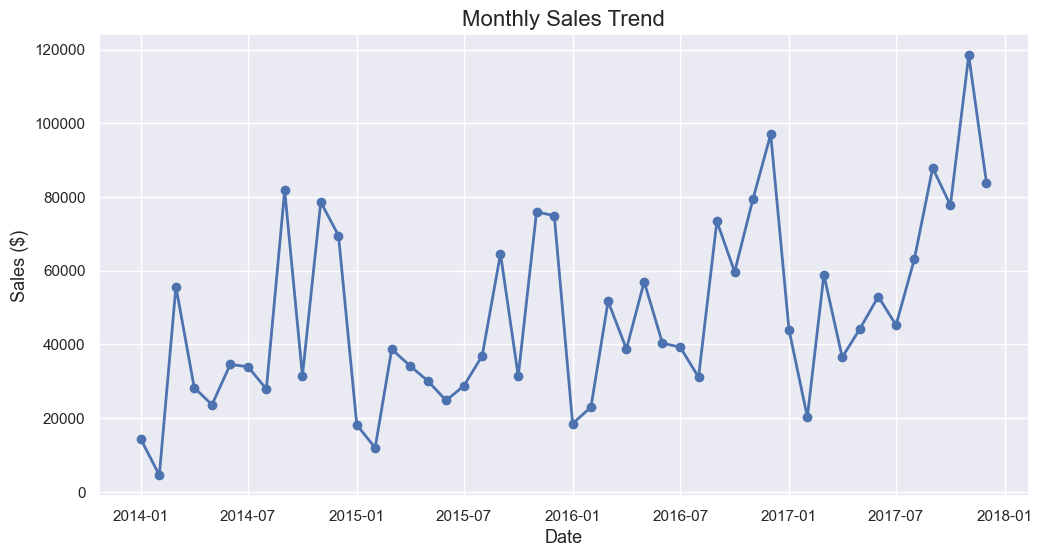

In [22]:
# this is a visualization for Total Sales for every month

Monthly_Metrics['Date'] = pd.to_datetime(
    Monthly_Metrics['Year'].astype(str) + '-' + Monthly_Metrics['Month'].astype(str) + '-01')
plt.figure(figsize=(12,6))
plt.plot(Monthly_Metrics['Date'],Monthly_Metrics['Total_Sales'],marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Sales ($)', fontsize= 13)
plt.show()

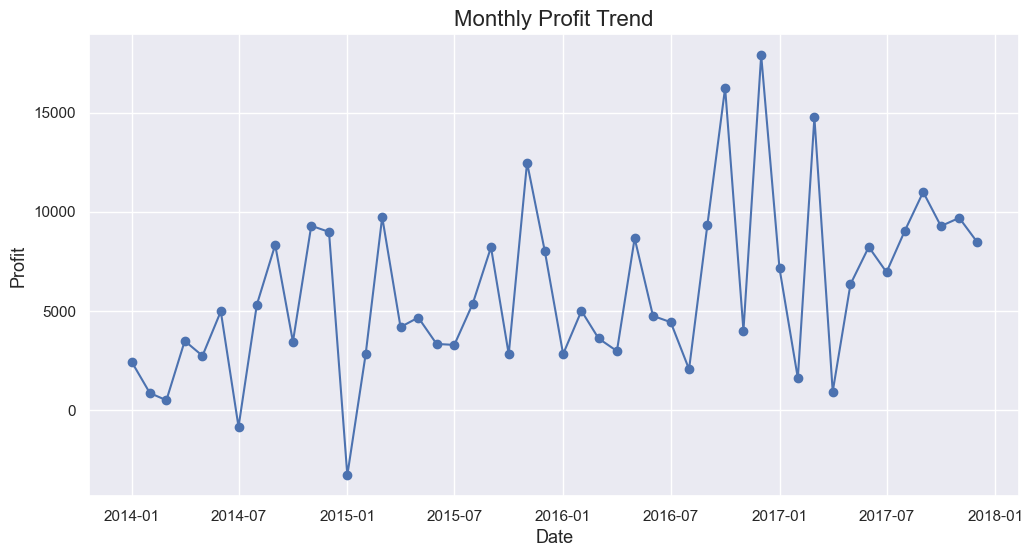

In [23]:
plt.figure(figsize=(12,6))
plt.plot(Monthly_Metrics['Date'], Monthly_Metrics['Total_Profit'], marker='o')
plt.title('Monthly Profit Trend', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Profit', fontsize=13)
plt.show()


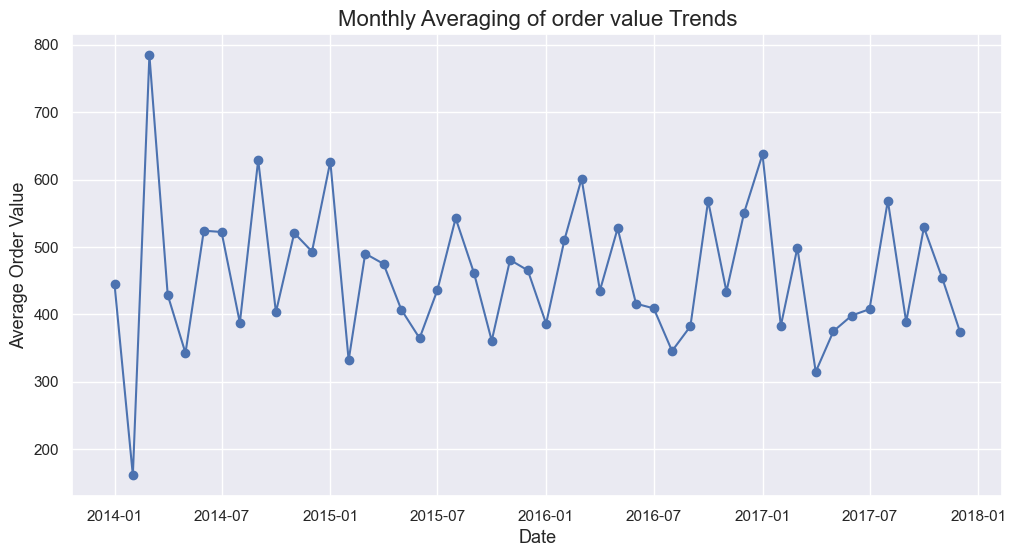

In [24]:
plt.figure(figsize=(12,6))
plt.plot(Monthly_Metrics['Date'], Monthly_Metrics['Avg_Order_Value'], marker='o')
plt.title('Monthly Averaging of order value Trends', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Average Order Value', fontsize=13)
plt.show()


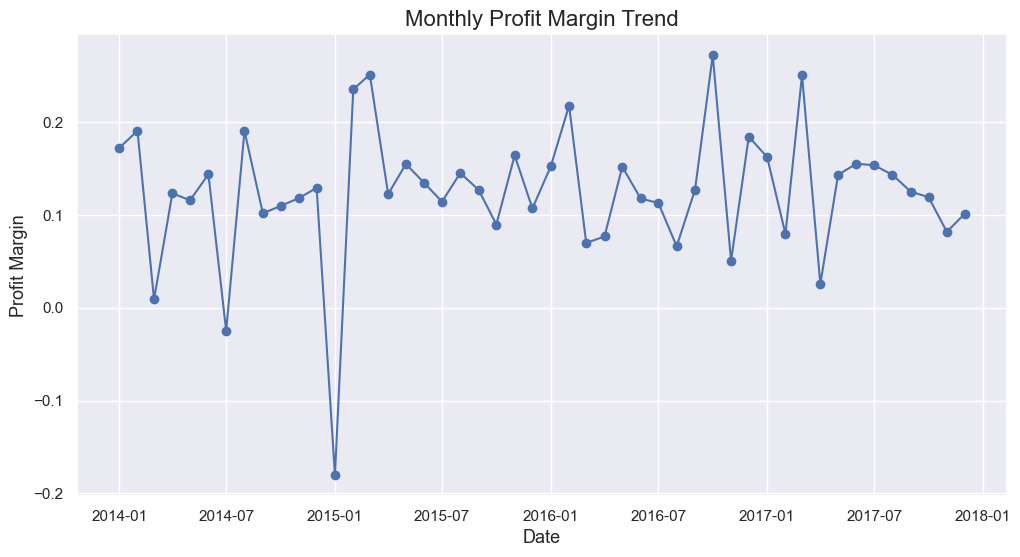

In [25]:
plt.figure(figsize=(12,6))
plt.plot(Monthly_Metrics['Date'], Monthly_Metrics['Profit_Margin'], marker='o')
plt.title('Monthly Profit Margin Trend', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Profit Margin', fontsize=13)
plt.show()


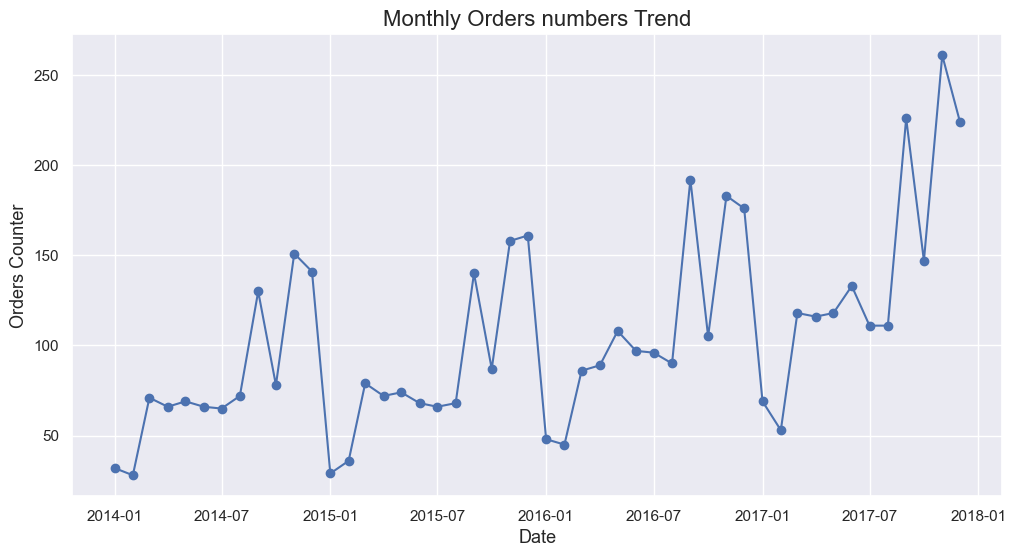

In [26]:
plt.figure(figsize=(12,6))
plt.plot(Monthly_Metrics['Date'], Monthly_Metrics['Num_Orders'], marker='o')
plt.title('Monthly Orders numbers Trend', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Orders Counter', fontsize=13)
plt.show()


<h3>Category-Level Analysis<h3>
Which product categories drive revenue, and do they actually generate profit?

This section evaluates whether high-revenue categories also generate strong profitability.



<h3>Hypotheses<h3>


    Technology generates the highest sales

    Office Supplies is the most profitable category

    Furniture has high sales but weaker profitability

In [27]:
Category_Analysis = df.groupby('Category').agg(Category_Total_Sales = ('Sales', 'sum'),
    Category_Total_Profit = ('Profit', "sum"), Category_Total_Orders= ('Order ID', 'nunique')).sort_values(ascending= True, by='Category_Total_Sales')

Category_Analysis['Category_Profit_Margin'] = Category_Analysis['Category_Total_Profit'] / Category_Analysis['Category_Total_Sales']


Category_Analysis

,Category_Total_Sales,Category_Total_Profit,Category_Total_Orders,Category_Profit_Margin
Category,,,,
Office Supplies,719047.03,122490.80,3742,0.17
Furniture,741999.80,18451.27,1764,0.02
Technology,836154.03,145454.95,1544,0.17


<h3>Findings<h3>

Technology leads in both total sales and total profit

Office Supplies has lower revenue but strong profit margins

Furniture generates high revenue but has the weakest profit margin, indicating pricing or discount inefficiencies

Technology converts revenue into profit more effectively than other categories.

<h3>Now let's Visualize And compare Sales and Profit<h3>

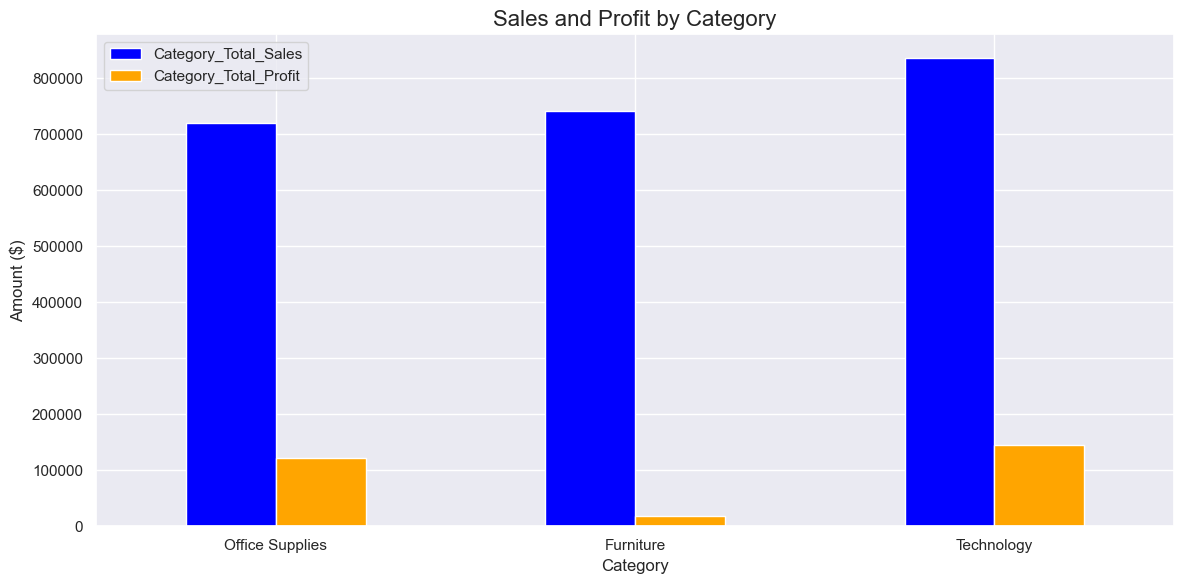

In [28]:
# Reset index to make Category a column
Category_Analysis_reset = Category_Analysis.reset_index()

# Plot Sales and Profit side by side

Category_Analysis_reset[['Category', 'Category_Total_Sales', 'Category_Total_Profit']].plot(
    x= 'Category',
    kind= 'bar',
    figsize=(12,6),
    color=['blue', 'orange']
)
plt.title('Sales and Profit by Category', fontsize=16)
plt.ylabel('Amount ($)', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=0) # this makes the category naming Horizontal
plt.tight_layout()
plt.show()

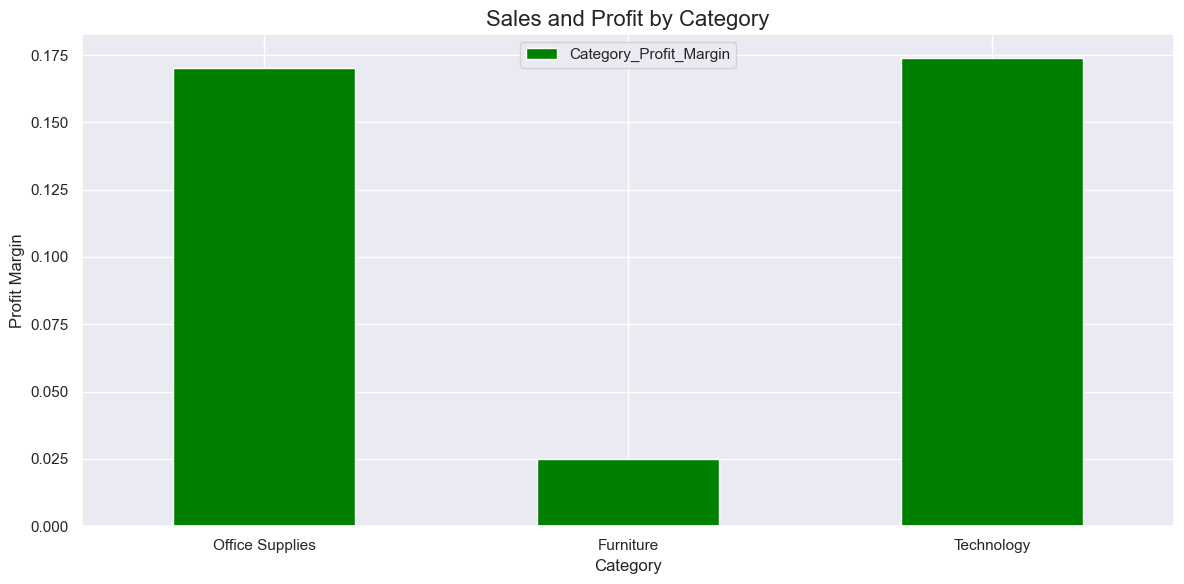

In [29]:
# Plot prfit margin

Category_Analysis_reset[['Category', 'Category_Profit_Margin']].plot(
    x= 'Category',
    kind= 'bar',
    figsize=(12,6),
    color='green'
)
plt.title('Sales and Profit by Category', fontsize=16)
plt.ylabel('Profit Margin', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

<h3>Sub-Category Analysis<h3>


To uncover drivers and insights within each category, sub-categories are evaluated based on sales and profit margin.



In [30]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [31]:
SubCategory_Analysis = df.groupby(['Category', 'Sub-Category']).agg(
    SubCategory_Total_Sales = ('Sales', 'sum'),
    SubCategory_Total_Profit = ('Profit', "sum"), 
    SubCategory_Total_Orders= ('Order ID', 'nunique'))

SubCategory_Analysis['SubCategory_Profit_Margin'] = SubCategory_Analysis['SubCategory_Total_Profit'] / SubCategory_Analysis['SubCategory_Total_Sales'] 


SubCategory_Analysis

SubCategory_Total_Sales  SubCategory_Total_Profit  SubCategory_Total_Orders  SubCategory_Profit_Margin
Category        Sub-Category                                                                                                        
Furniture       Bookcases                   114880.00                  -3472.56                       224                      -0.03
                Chairs                      328449.10                  26590.17                       576                       0.08
                Furnishings                  91705.16                  13059.14                       877                       0.14
                Tables                      206965.53                 -17725.48                       307                      -0.09
Office Supplies Appliances                  107532.16                  18138.01                       451                       0.17
                Art                          27118.79                   6527.79                       731                       0.24
                Binders                     203412.73                  30221.76                      1316                       0.15
                Envelopes                    16476.40                   6964.18                       249                       0.42
                Fasteners                     3024.28                    949.52                       215                       0.31
                Labels                       12486.31                   5546.25                       346                       0.44
                Paper                        78479.21                  34053.57                      1191                       0.43
                Storage                     223843.61                  21278.83                       777                       0.10
                Supplies                     46673.54                  -1189.10                       187                      -0.03
Technology      Accessories                 167380.32                  41936.64                       718                       0.25
                Copiers                     149528.03                  55617.82                        68                       0.37
                Machines                    189238.63                   3384.76                       112                       0.02
                Phones                      330007.05                  44515.73                       814                       0.13

<h3>Benchmarking Approach: "Important"<h3>

Sales are compared to the median sub-category sales

Profitability is compared to the overall business profit margin

This avoids mixed thresholds and ensures consistent classification.

<h2>Visualization<h2>


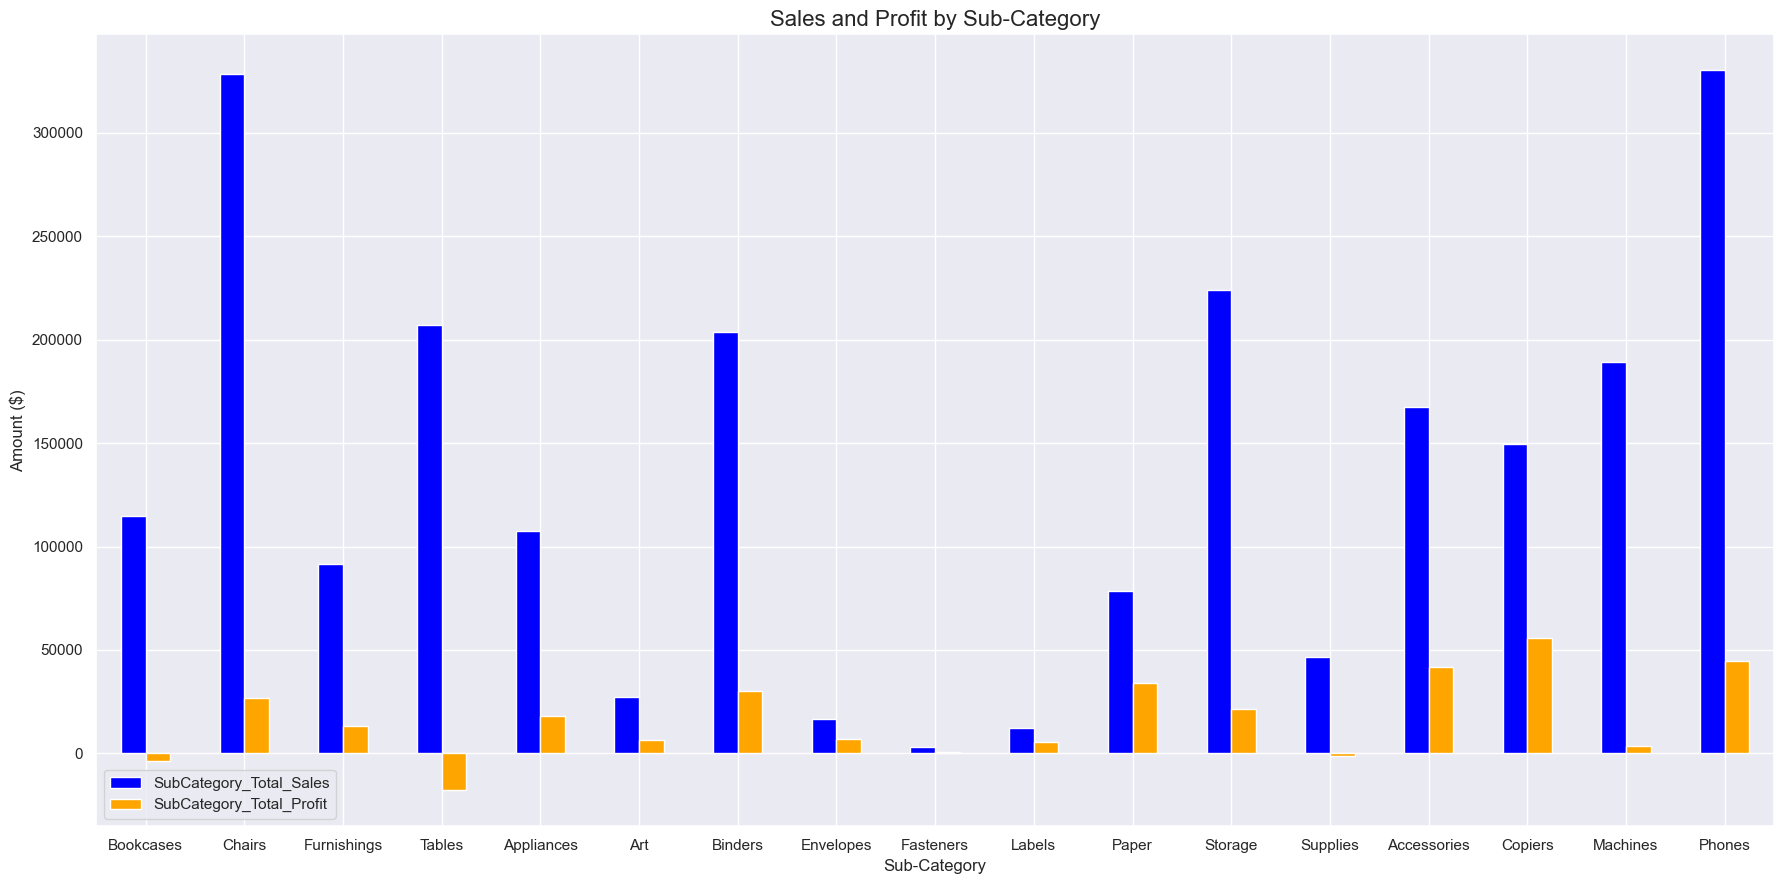

In [32]:
SubCategory_Analysis_reset = SubCategory_Analysis.reset_index()

SubCategory_Analysis_reset[['Sub-Category', 'SubCategory_Total_Sales', 'SubCategory_Total_Profit']].plot(
    x= 'Sub-Category',
    kind= 'bar',
    figsize=(18,9),
    color=['blue', 'orange']
)
plt.title('Sales and Profit by Sub-Category', fontsize=16)
plt.ylabel('Amount ($)', fontsize=12)
plt.xlabel('Sub-Category', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

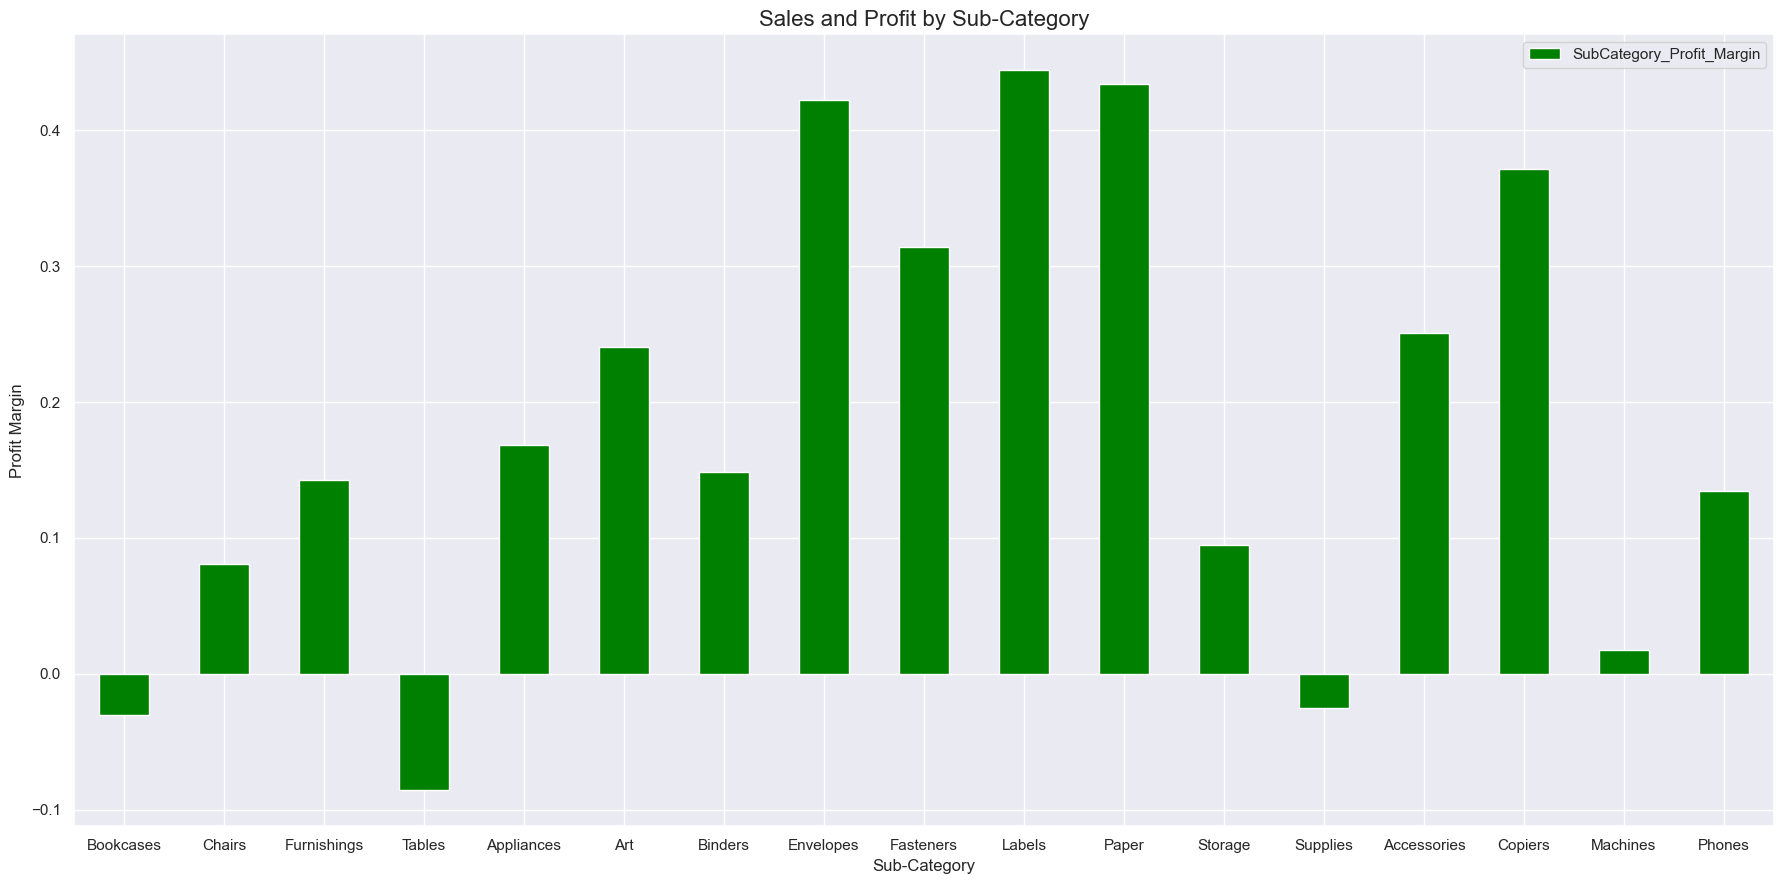

In [33]:
SubCategory_Analysis_reset[['Sub-Category', 'SubCategory_Profit_Margin']].plot(
    x= 'Sub-Category',
    kind= 'bar',
    figsize=(18,9),
    color='green'
)
plt.title('Sales and Profit by Sub-Category', fontsize=16)
plt.ylabel('Profit Margin', fontsize=12)
plt.xlabel('Sub-Category', fontsize=12)
plt.xticks(rotation=0) # this makes the category naming Horizontal
plt.tight_layout()
plt.show()

<h4>Sub-categories are evaluated using relative benchmarks instead of fixed cutoffs.



Sales are compared to the median sales level across all sub-categories, 

and profitability is compared to the overall profit margin of the business.


This keeps the analysis consistent and avoids relying on arbitrary thresholds.<h4>

<h2>Sub-Category Tiering Framework<h2>

<h3>Stars: Core performers. Drive both revenue and profitability. "High sales and high profitability"<h3>


<h3>Volume Traps: Revenue-heavy but inefficient low or negative margins. Likely impacted by discounts or high costs. "High sales but low profitability"<h3>


<h3>Hidden Potentials: Efficient but under-scaled. Good candidates for marketing or promotion. "Low sales but high profitability"<h3>


<h3>Underperformers: Weak on both scale and efficiency. Candidates for review or restructuring. " Low sales and low profitability"<h3>




In [34]:
# Step 0: Confirm thresholds

Sales_Threshold = SubCategory_Analysis_reset['SubCategory_Total_Sales'].median()
Profit_Threshold = profit_margin.round(3) # this is the Overall profit Margin


# create an empty tier column

SubCategory_Analysis_reset['Tier'] = None

# now let's identify high and low sales and profit margin

high_sales = SubCategory_Analysis_reset['SubCategory_Total_Sales'] >= Sales_Threshold

high_margin = SubCategory_Analysis_reset['SubCategory_Profit_Margin'] >= Profit_Threshold

# now let's apply the Classification

SubCategory_Analysis_reset.loc[high_sales & high_margin, 'Tier'] = 'Stars'

SubCategory_Analysis_reset.loc[high_sales & ~high_margin, 'Tier'] = 'Volume Traps'

SubCategory_Analysis_reset.loc[~high_sales & high_margin, 'Tier'] = 'Hidden Potentials'

SubCategory_Analysis_reset.loc[~high_sales & ~high_margin, 'Tier'] = 'Underperformers'

Final_Tiering = SubCategory_Analysis_reset[['Category', 'Sub-Category', 'SubCategory_Total_Sales', 'SubCategory_Profit_Margin', 'Tier']]

print(SubCategory_Analysis_reset[['Category', 'Sub-Category', 'SubCategory_Total_Sales', 'SubCategory_Profit_Margin', 'Tier']])

tier_counts = SubCategory_Analysis_reset['Tier'].value_counts()
print("\nNumber of sub-categories in each tier:")
print(tier_counts)


           Category Sub-Category  SubCategory_Total_Sales  SubCategory_Profit_Margin               Tier
0         Furniture    Bookcases                114880.00                      -0.03       Volume Traps
1         Furniture       Chairs                328449.10                       0.08       Volume Traps
2         Furniture  Furnishings                 91705.16                       0.14  Hidden Potentials
3         Furniture       Tables                206965.53                      -0.09       Volume Traps
4   Office Supplies   Appliances                107532.16                       0.17  Hidden Potentials
5   Office Supplies          Art                 27118.79                       0.24  Hidden Potentials
6   Office Supplies      Binders                203412.73                       0.15              Stars
7   Office Supplies    Envelopes                 16476.40                       0.42  Hidden Potentials
8   Office Supplies    Fasteners                  3024.28       

In [35]:
Sorting_Tiers = SubCategory_Analysis_reset[['Category', 'Sub-Category', 'Tier']].groupby(['Category', 'Tier']).size().reset_index(name= 'Count')
Sorting_Tiers

,Category,Tier,Count
0,Furniture,Hidden Potentials,1
1,Furniture,Volume Traps,3
2,Office Supplies,Hidden Potentials,6
3,Office Supplies,Stars,1
4,Office Supplies,Underperformers,1
5,Office Supplies,Volume Traps,1
6,Technology,Stars,3
7,Technology,Volume Traps,1


<h3>Tiering Visualization<h3>

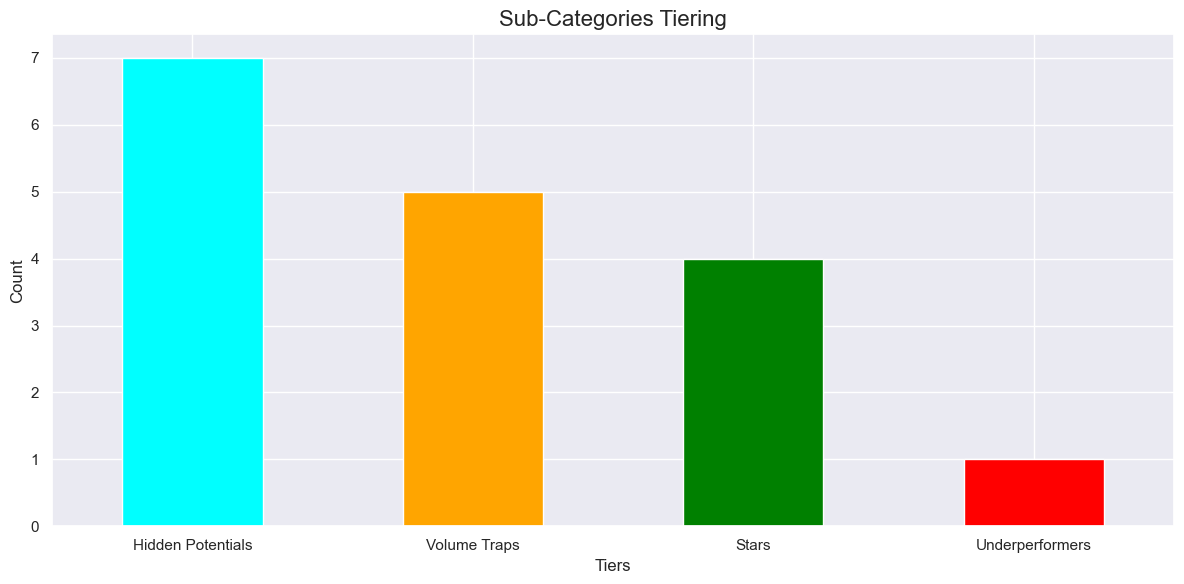

In [36]:
colors = ['cyan', 'orange', 'green', 'red']  # Stars, Volume Traps, Hidden Gems, Underperformers

tier_counts.plot(
    x= 'Tier',
    kind= 'bar',
    figsize=(12,6),
    color=colors
)

plt.title('Sub-Categories Tiering', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Tiers', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [37]:
Tiers_Pivot = Sorting_Tiers.pivot(
    index='Category',
    columns='Tier',
    values='Count'
)

Tiers_Pivot = Tiers_Pivot.fillna(0) # if some sub-categories do not have any of the tiers 

Tiers_Pivot = Tiers_Pivot[
    ['Stars', 'Hidden Potentials', 'Volume Traps', 'Underperformers']
]                     # this is to rerarrange the columns

Tiers_Pivot

Tier,Stars,Hidden Potentials,Volume Traps,Underperformers
Category,,,,
Furniture,0.00,1.00,3.00,0.00
Office Supplies,1.00,6.00,1.00,1.00
Technology,3.00,0.00,1.00,0.00


“This chart shows how sub-categories are distributed across profitability tiers within each category.”

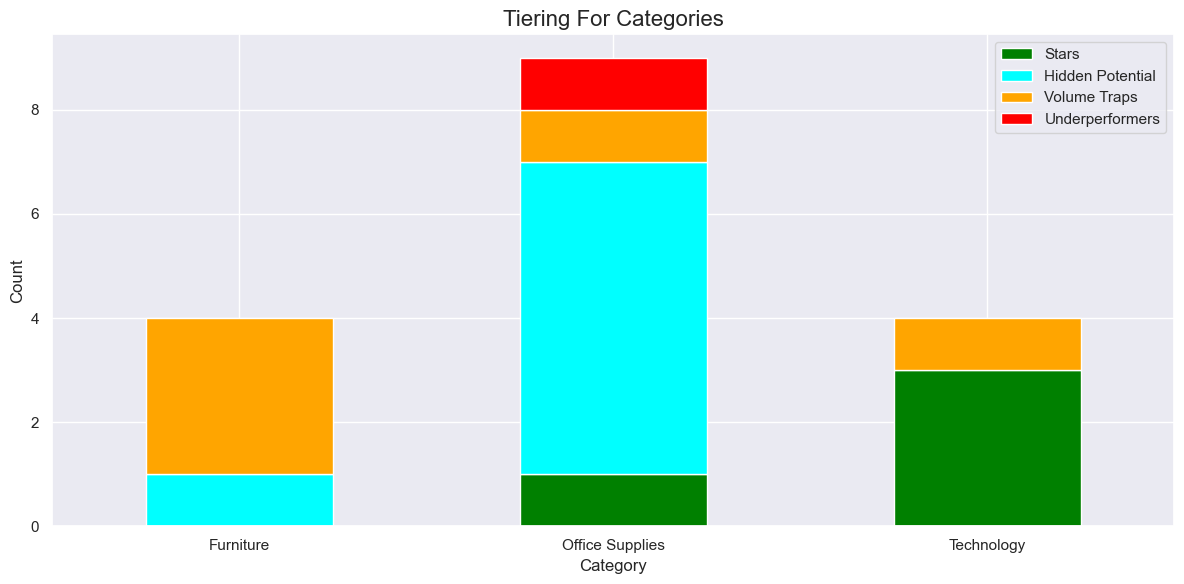

In [38]:
Tiers_Pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=['green', 'cyan', 'Orange', 'red']
)

plt.title('Tiering For Categories', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Stars', 'Hidden Potential', 'Volume Traps', 'Underperformers']) # Now you know blue=Sales, orange=Profit
plt.tight_layout()
plt.show()

<h2>Key Insights<h2>

Technology has the strongest portfolio, with most sub-categories classified as Stars

Office Supplies contains several Hidden Potentials, indicating growth opportunities

Furniture is dominated by Volume Traps, highlighting discount and pricing inefficiencies

Notably: - Tables emerge as a clear Volume Trap - Art appears as a Hidden Potential

<h2>Discount vs. Profit analysis<h2>

We are performing those analysis to measure the actual impact of discounting strategies.

<h3>The real business questions are:<h3>





At what discount levels does profitability break down?

Which products or segments can tolerate discounts without destroying margin?

Where are discounts being misused (i.e., subsidizing unprofitable sales)?

Are discounts driving volume enough to compensate for margin loss?

<h3>Discounts are grouped into four buckets:<h3>

No Discount

Low (0–10%)

Medium (10–30%)

High (>30%)

In [39]:
df['Is_Discounted'] = df['Discount'] > 0 # this is to create a new column to show if there is a dicount or not 

# now let's write a fucntion to classify each dicount by range

def Discount_Bucket(d):
    if d == 0:
        return 'No Discount'
    elif d <= 0.1:
        return 'Low (0-10%)'
    elif d <= 0.3:
        return 'Medium (10-30%)'
    else:
        return 'High (>30%)'
    
df['Discount_Bucket'] = df['Discount'].apply(Discount_Bucket)    

In [40]:
df['is_profitable'] = df['Profit'] > 0


**Profitability Rate: is the number of Profitable Transaction to the number of Transactions.**



In [41]:
Category_Dicount_Analysis = df.groupby(['Category', 'Is_Discounted']).agg(
    total_sales=('Sales','sum'),
    total_profit=('Profit','sum'),
    total_quantity=('Quantity','sum'),
    avg_discount=('Discount','mean'),
    avg_profit_per_transaction=('Profit','mean'),
    num_transactions=('Order ID','count'),
    num_profitable_transactions=('is_profitable','sum')

).reset_index()

Category_Dicount_Analysis['profitability_rate'] = Category_Dicount_Analysis['num_profitable_transactions'] / Category_Dicount_Analysis['num_transactions']

Category_Dicount_Analysis


,Category,Is_Discounted,total_sales,total_profit,total_quantity,avg_discount,avg_profit_per_transaction,num_transactions,num_profitable_transactions,profitability_rate
0,Furniture,False,256025.27,58133.08,3224,0.00,69.54,836,836,1.00
1,Furniture,True,485974.53,-39681.80,4804,0.29,-30.88,1285,538,0.42
2,Office Supplies,False,442150.00,130506.11,11886,0.00,41.71,3129,3101,0.99
3,Office Supplies,True,276897.03,-8015.31,11020,0.33,-2.77,2897,2010,0.69
4,Technology,False,389733.20,132348.42,3157,0.00,158.88,833,831,1.00
5,Technology,True,446420.83,13106.53,3782,0.24,12.93,1014,742,0.73


### So now let's answer some Questions

**Q1: Are discounted transactions more or less profitable?**  
We can see that the average profit per transaction with discounts is far less than without discounts.

**Q2: What percentage of transactions are profitable?**  
A lower profitability rate indicates more money is lost, as we can see with discounted transactions.

**Q3: Do discounted transactions sell more items?**  
Not in all categories. There is an increase in quantity and sales only for Technology and Furniture.  
The increase in quantity is small, and Office Supplies did not increase in either sales or quantity.

**Q4: Are some categories affected more than others?**  
Yes, Office Supplies and Furniture were negatively affected, especially Furniture.

**Q5: Overall insight**  
Discounts may increase sales, but in Office Supplies there isn’t any increase, and in Furniture the profitability rate is very low.  
Only Technology can tolerate high discounts without hurting profit.


### Now Follow-up Questions


**Are certain categories driving these losses?**  
Yes, Furniture (especially Tables and Bookcases) and Office Supplies (Supplies).

**Is the quantity increase enough to compensate for the loss?**  
No, it is not enough.

**Should we limit discounts in unprofitable categories?**  
Yes, we should limit discounts.



As we can see in the visualization below the Difference in Profit between Discounted and Non-Discounted.


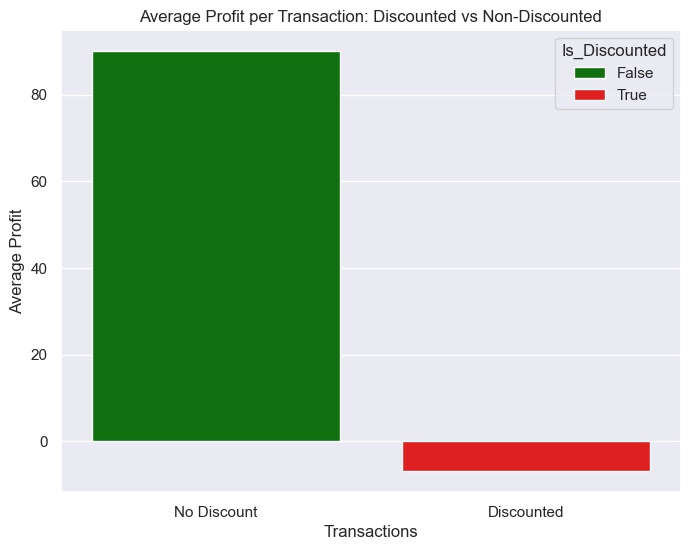

In [42]:
plt.figure(figsize=(8,6))

sns.barplot(x='Is_Discounted', y='avg_profit_per_transaction', data= Category_Dicount_Analysis, errorbar=None, hue= 'Is_Discounted',palette=['green', 'red'])

plt.title('Average Profit per Transaction: Discounted vs Non-Discounted')
plt.xlabel('Transactions')
plt.ylabel('Average Profit')
plt.xticks([0,1], ['No Discount', 'Discounted'])  # labels the X axis categories
plt.show()

**The Visualization below shows the difference in Profitability Rate between Discounts and Non-Discounts**

So that tells us with Non-Discounted Transactions we are profitable almost 100% of the times.

On the other hand we are only profitable 60% of the times with Discounted Transactions. 

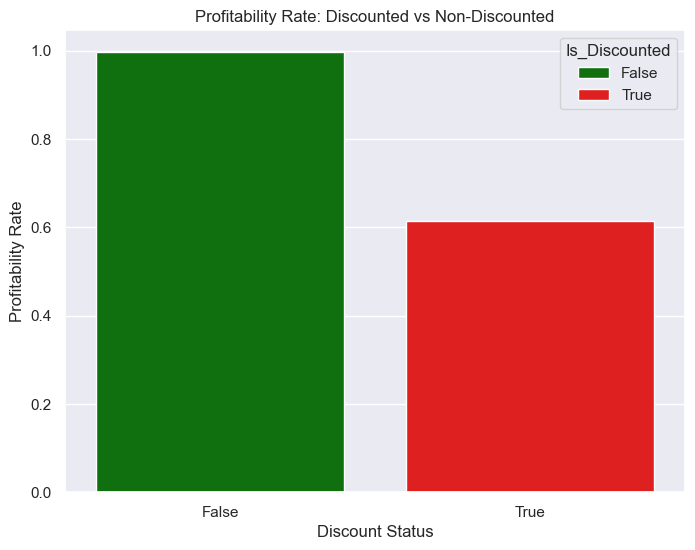

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(x='Is_Discounted', y='profitability_rate',hue= 'Is_Discounted', data= Category_Dicount_Analysis, errorbar=None, palette=['green', 'red'])

plt.title('Profitability Rate: Discounted vs Non-Discounted')
plt.xlabel('Discount Status')
plt.ylabel('Profitability Rate')
plt.show()

**<h3><h3>**

How does the Discounts levels affect each Category?

In [44]:
Discount_buckets_Analysis = df.groupby(['Category', 'Sub-Category', 'Discount_Bucket']).agg(
   total_sales=('Sales','sum'),
    total_profit=('Profit','sum'),
    total_quantity=('Quantity','sum'),
    avg_discount=('Discount','mean'),
    avg_profit_per_transaction=('Profit','mean'),
    num_transactions=('Order ID','count'),
    num_profitable_transactions=('is_profitable','sum') 
).reset_index()

Discount_buckets_Analysis['profitability_rate'] = Discount_buckets_Analysis['num_profitable_transactions'] / Discount_buckets_Analysis['num_transactions']




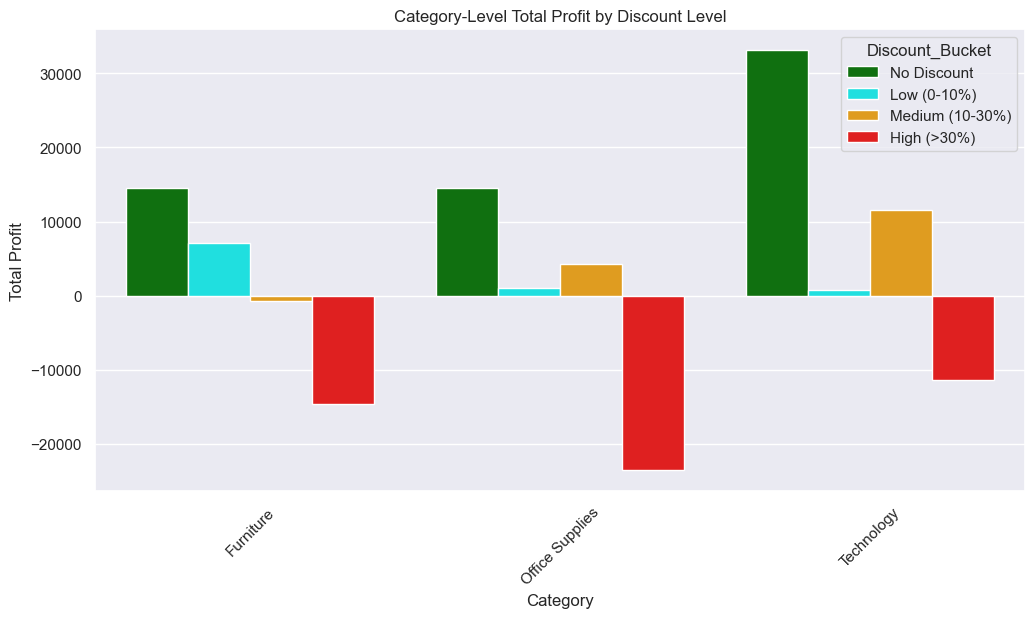

In [45]:

plt.figure(figsize=(12,6))

sns.barplot(x= 'Category', y= 'total_profit', hue= 'Discount_Bucket', data=Discount_buckets_Analysis,  hue_order=[
        'No Discount',
        'Low (0-10%)',
        'Medium (10-30%)',
        'High (>30%)'
    ],errorbar=None, palette=[ 'green','cyan','orange','red'])

plt.title('Category-Level Total Profit by Discount Level')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

**So we can state from both Visualizations:**

1- All categories does not tolerate high discounts.

2- Technology can Tolerate medium discounts while Office Supplies can Tolerate medium discounts with certain sub-categories.

3- Furniture can only tolerate low discounts.

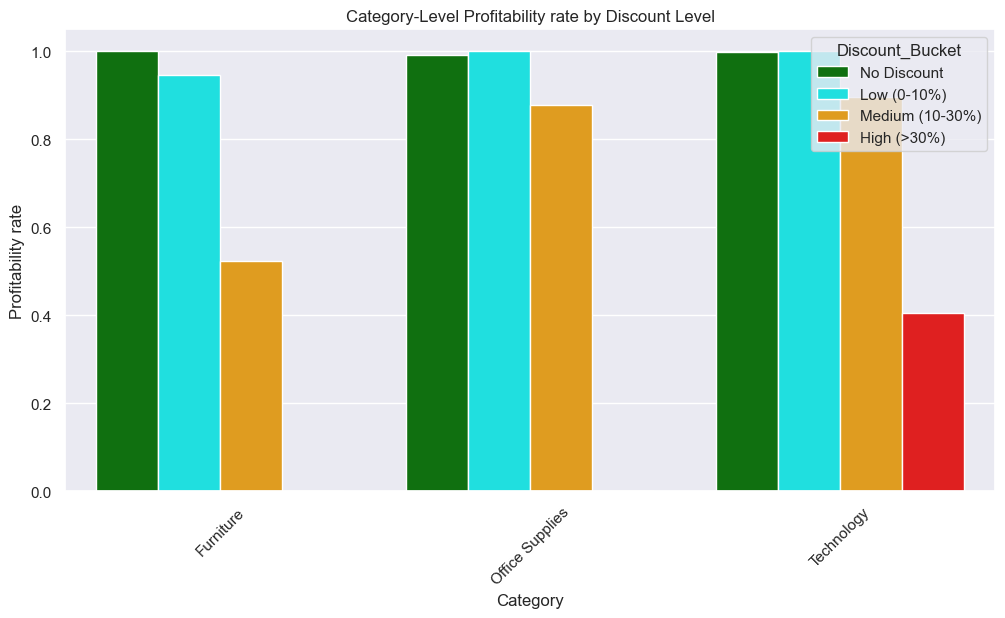

In [46]:

plt.figure(figsize=(12,6))

sns.barplot(x= 'Category', y= 'profitability_rate', hue= 'Discount_Bucket', data=Discount_buckets_Analysis,  hue_order=[
        'No Discount',
        'Low (0-10%)',
        'Medium (10-30%)',
        'High (>30%)'
    ],errorbar=None, palette=[ 'green','cyan','orange','red'])

plt.title('Category-Level Profitability rate by Discount Level')
plt.xlabel('Category')
plt.ylabel('Profitability rate')
plt.xticks(rotation=45)
plt.show()

<h3>Sub-Category Discount Deep Dive<h3>

In [47]:
# first grouping every category

furniture_data = Discount_buckets_Analysis[
    Discount_buckets_Analysis['Category'] == 'Furniture'
]

office_supplies_data = Discount_buckets_Analysis[
    Discount_buckets_Analysis['Category'] == 'Office Supplies'
]


technology_data = Discount_buckets_Analysis[
    Discount_buckets_Analysis['Category'] == 'Technology'
]



**Furniture Visualization**

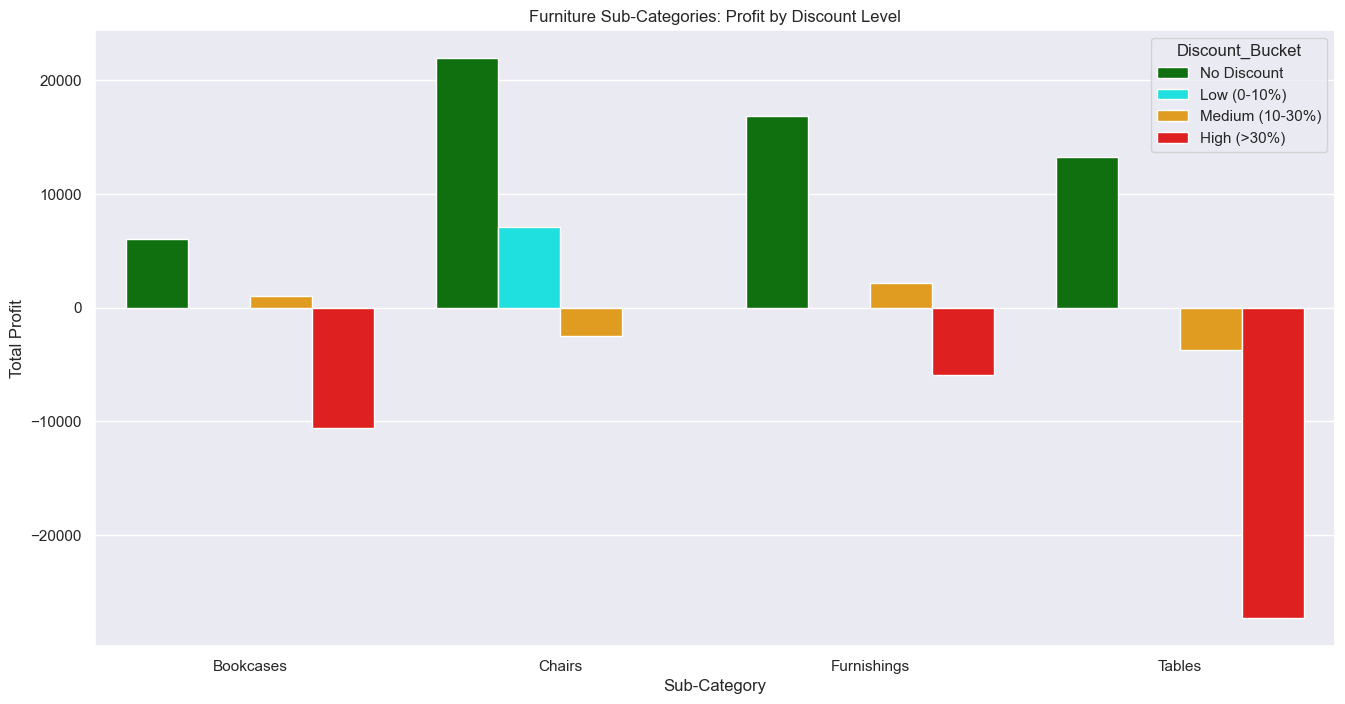

In [48]:
plt.figure(figsize=(16,8))


sns.barplot(
    x='Sub-Category',
    y='total_profit',
    hue='Discount_Bucket',
    data=furniture_data,
    hue_order=[
        'No Discount',
        'Low (0-10%)',
        'Medium (10-30%)',
        'High (>30%)'
    ],errorbar=None, palette=[ 'green','cyan','orange','red']
)

plt.title('Furniture Sub-Categories: Profit by Discount Level')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

**We can state from the visualization for Furniture:**

1- Tables are the most affected with high and medium discounts and cannot tolerate them.

2- Bookcases cannot tolerate high discounts and for the medium dicounts it's better to minimize them as much as possible.

3- Chairs can only tolerate low discounts.

4- Furnishings can tolerate limited medium discounts.

5- Low discounts are rarely applied in Furniture sub-categories, suggesting discount strategies are typically aggressive rather than incremental.

**Office Supplies visualization**

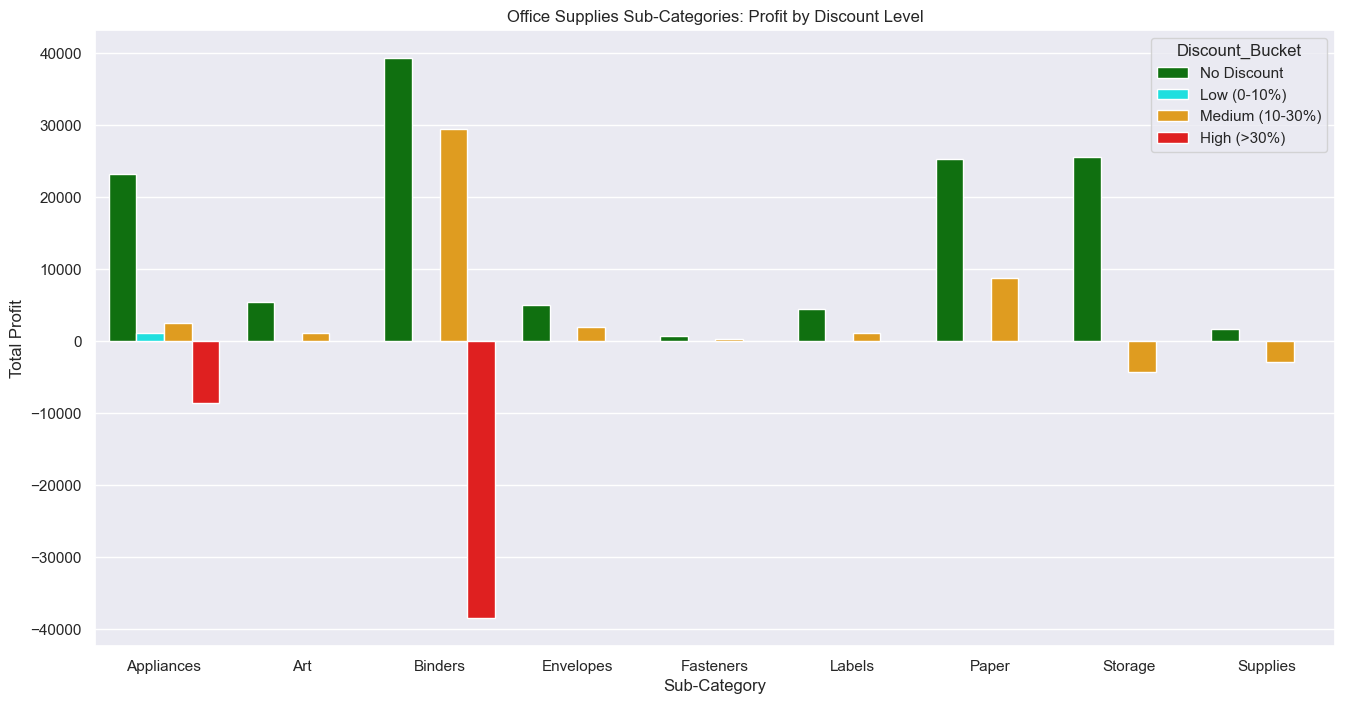

In [49]:
plt.figure(figsize=(16,8))


sns.barplot(
    x='Sub-Category',
    y='total_profit',
    hue='Discount_Bucket',
    data=office_supplies_data,
    hue_order=[
        'No Discount',
        'Low (0-10%)',
        'Medium (10-30%)',
        'High (>30%)'
    ],errorbar=None, palette=[ 'green','cyan','orange','red']
)

plt.title('Office Supplies Sub-Categories: Profit by Discount Level')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

**We can state from the visualization for Office Supplies:**

1- Appliances and Binders are the most affected with high discounts and cannot tolerate them.

2- Storage and Supplies Cannot tolerate medium discounts.

3- Binders and Paper handle medium discounts relatively well.

4- The rest can handle limited medium discounts.

5- Low discounts are rarely applied.

**Technology Visualization**

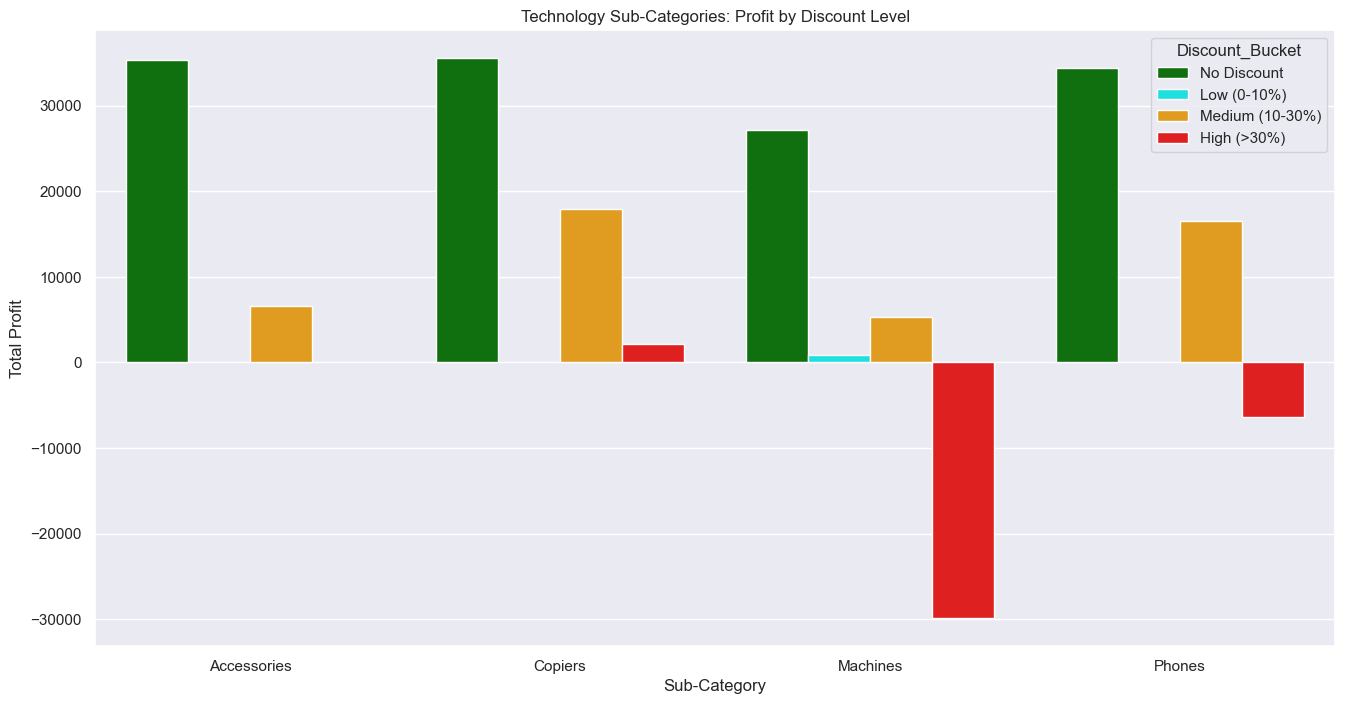

In [50]:
plt.figure(figsize=(16,8))


sns.barplot(
    x='Sub-Category',
    y='total_profit',
    hue='Discount_Bucket',
    data=technology_data,
    hue_order=[
        'No Discount',
        'Low (0-10%)',
        'Medium (10-30%)',
        'High (>30%)'
    ],errorbar=None, palette=[ 'green','cyan','orange','red']
)

plt.title('Technology Sub-Categories: Profit by Discount Level')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

**We can state from the visualization for Technology:**

1- Machines and Phones are the most affected with high discounts.

2- Copiers can tolerate high discounts.

3- All of the Sub-Categories can handle medium discounts.

4- Low discounts are rarely applied.


<h1>Discounts Conclusion.<h1>

<h2>Discounting is frequently misused across categories. While it may increase sales volume, it often
destroys profitability. A differentiated discount strategy by category and sub-category is essential for
sustainable growth.<h2>

<h1>Final Summary & Key Recommendations.<h1>


<h2>Key Findings.<h2> 

- Sales peak in the second half of each year, driven by order volume rather than order value.
- Technology is the strongest category in both revenue and profitability.
- Furniture generates high revenue but suffers from weak margins due to discounting.
- Discounted transactions are significantly less profitable than non-discounted ones.
- High discounts (>30%) consistently destroy profitability across all categories.
- Medium discounts are sustainable only in selected Technology and Office Supplies sub-categories.

<h2>Key Recommendations.<h2>

- Discount strategies should be category- and sub-category–specific rather than uniform.
- Sub-categories classified as **Hidden Potentials** should be prioritized for marketing and growth, as they are already profitable but under-scaled.